# Superdese Coding


In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print('Init state = ',initState)
    qr = QuantumRegister(n,"q")
    qc = ClassicalRegister(n, "c")
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHistogram(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qboj = assemble(circ, shots=shots)
    results = qasm_sim.run(qboj).result()
    counts = results.get_counts()
    return counts

## Superdense

In [7]:
def superDense(b):
    circ = makeCirc(2, '00')
    circ.h(0)
    circ.cx(0, 1)
    
    circ.barrier()
    if (b[0] == '1'):
        circ.x(0)
    if (b[1] == '1'):
        circ.z(0)
    circ.barrier()
    # Send qubit to Bob
    circ.cx(0, 1)
    circ.h(0)
    circ.barrier()
    circ.measure(range(0,2), range(0,2))
    return circ

In [37]:
circ = superDense('11')

Init state =  00


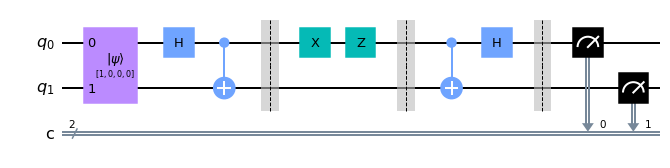

In [38]:
circ.draw();

In [39]:
getMeasure(circ, 1)[0]

'11'

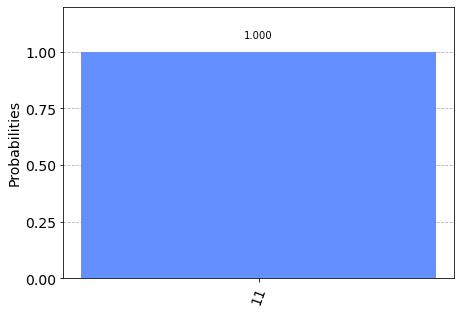

In [40]:
plot_histogram(getHistogram(1024, circ));